## Fourier transforms on time series

We expect many of the time series we look at to show seasonality with a period of 1 year.

One way to test this is to perform a Fast Fourier Transform (FFT) to get the power spectrum in frequency space.

In [1]:
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
from pyveg.src.data_analysis_utils import *


We read in the summary json file produced by running `pyveg_gee_analysis`.  

The following function will give us a dictionary of dataframes - likely one containing network centrality values from a satellite that gives us NDVI images, and one containing weather data.

In [4]:
dfs = variable_read_json_to_dataframe("/Users/nbarlow/DS4SDData/labyrinths_summary.json")

We now convert the dataframes in this dict to new dataframes that have datetime index, and put them into another dict with the same keys as the input one.

In [5]:
ts_dict = make_time_series(dfs)

In order to run FFT on the time series, we need evenly sampled time points - we can interpolate to get one row per day.  We also don't care about the actual dates at this point - we can just look at the selected column, which is "offset50".

In [6]:
ts = resample_time_series(ts_dict["COPERNICUS/S2"], col_name="offset50")

Now we do the FFT, and get arrays of frequencies and powers ready to plot.

In [7]:
xvals, yvals = fft_series(ts)

We can discard the first point when we plot - this will be a big peak, corresponding to non-periodic variations.   

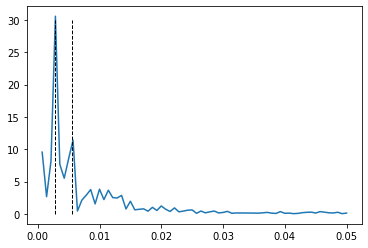

In [11]:
%matplotlib inline
plt.plot(xvals[1:],yvals[1:])
# draw a vertical line at frequency 1/year
plt.plot([1.0/365.,1.0/365.], [0, 30.], color='black', linewidth=1, linestyle='--')
plt.plot([1.0/182.5,1.0/182.5], [0, 30.], color='black', linewidth=1, linestyle='--')

We can see there is a big peak at 1 year, as expected, and a smaller peak corresponding to variations with a frequency of six months.

Now we can look at the weather time series for the same area:

In [12]:
ts_dict["ECMWF/ERA5/MONTHLY"].columns

Index(['mean_2m_air_temperature', 'total_precipitation'], dtype='object')

In [13]:
ts_rainfall = resample_time_series(ts_dict["ECMWF/ERA5/MONTHLY"], col_name="total_precipitation")

In [14]:
xvals_rainfall, yvals_rainfall = fft_series(ts_rainfall)

In [15]:
ts_temp = resample_time_series(ts_dict["ECMWF/ERA5/MONTHLY"], col_name="mean_2m_air_temperature")
xvals_temp, yvals_temp = fft_series(ts_temp)

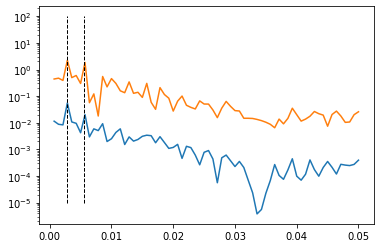

In [16]:
plt.plot(xvals_rainfall[1:],yvals_rainfall[1:])
plt.plot(xvals_temp[1:],yvals_temp[1:])
plt.yscale("log")
# plot vertical lines at 1/year and 1/(6-months)
plt.plot([1.0/182.5,1.0/182.5], [1e-5, 100.], color='black', linewidth=1, linestyle='--')
plt.plot([1.0/365.,1.0/365.], [1e-5, 100.], color='black', linewidth=1, linestyle='--')